<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_12/Khalid_Almalki_decision_tree_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

Target is `ArrDelayBinary`.

##Importing Libraries / Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
sns.set_palette('Set2')

In [2]:
df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet')

##EDA

In [4]:
df.sample(5)

,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
905773,1,1990.0,11.0,25.0,7.0,1630.0,1751.0,4.0,442.0,82.0,11.0,204.0,357.0,0.0
406012,0,1989.0,1.0,6.0,5.0,1842.0,1953.0,12.0,242.0,73.0,1.0,61.0,349.0,0.0
2958685,1,1988.0,8.0,21.0,7.0,1900.0,2141.0,13.0,157.0,166.0,184.0,85.0,992.0,0.0
3231138,0,1991.0,9.0,1.0,7.0,1300.0,1825.0,6.0,750.0,198.0,131.0,149.0,1521.0,0.0
134268,0,1992.0,2.0,17.0,1.0,125.0,535.0,1.0,394.0,186.0,9.0,218.0,1449.0,0.0


###**Data Understanding**

####Gathering information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ArrDelayBinary     int32  
 1   t_Year             float32
 2   t_Month            float32
 3   DayofMonth         float32
 4   DayofWeek          float32
 5   CRSDepTime         float32
 6   CRSArrTime         float32
 7   UniqueCarrier      float32
 8   FlightNum          float32
 9   ActualElapsedTime  float32
 10  Origin             float32
 11  Dest               float32
 12  Distance           float32
 13  Diverted           float32
dtypes: float32(13), int32(1)
memory usage: 213.6 MB


####Dataset Shape

In [6]:
df.shape

(4000000, 14)

####Viewing some basic statistical details‏

In [7]:
 df.describe()

,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0
mean,1.731863e-01,2.039449e+03,6.417309e+00,1.565482e+01,3.938582e+00,1.350687e+03,1.493719e+03,6.949525e+00,7.469470e+02,1.087436e+02,1.266469e+02,1.252733e+02,6.290024e+02,0.0
std,3.784083e-01,4.959487e+01,3.490904e+00,8.775101e+00,1.991552e+00,4.697346e+02,4.823956e+02,4.989020e+00,5.349865e+02,6.385383e+01,7.065054e+01,7.045547e+01,5.141589e+02,0.0
min,0.000000e+00,1.987000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,1.100000e+01,0.0
25%,0.000000e+00,1.988000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.330000e+02,1.116000e+03,3.000000e+00,3.300000e+02,6.300000e+01,6.200000e+01,6.100000e+01,2.640000e+02,0.0
50%,0.000000e+00,1.990000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.520000e+03,7.000000e+00,6.350000e+02,9.000000e+01,1.320000e+02,1.310000e+02,4.530000e+02,0.0
75%,0.000000e+00,1.991000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.736000e+03,1.913000e+03,1.200000e+01,1.067000e+03,1.380000e+02,1.840000e+02,1.830000e+02,8.590000e+02,0.0
max,1.000000e+00,1.992000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.400000e+01,6.894000e+03,1.736000e+03,2.550000e+02,2.540000e+02,4.983000e+03,0.0


####Checking Null Values

In [8]:
df.isnull().sum()

ArrDelayBinary       0
t_Year               0
t_Month              0
DayofMonth           0
DayofWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
Origin               0
Dest                 0
Distance             0
Diverted             0
dtype: int64

####Value Counts

In [9]:
df.ArrDelayBinary.value_counts()

0    3307255
1     692745
Name: ArrDelayBinary, dtype: int64

In [10]:
df.Diverted.value_counts()

0.0    4000000
Name: Diverted, dtype: int64

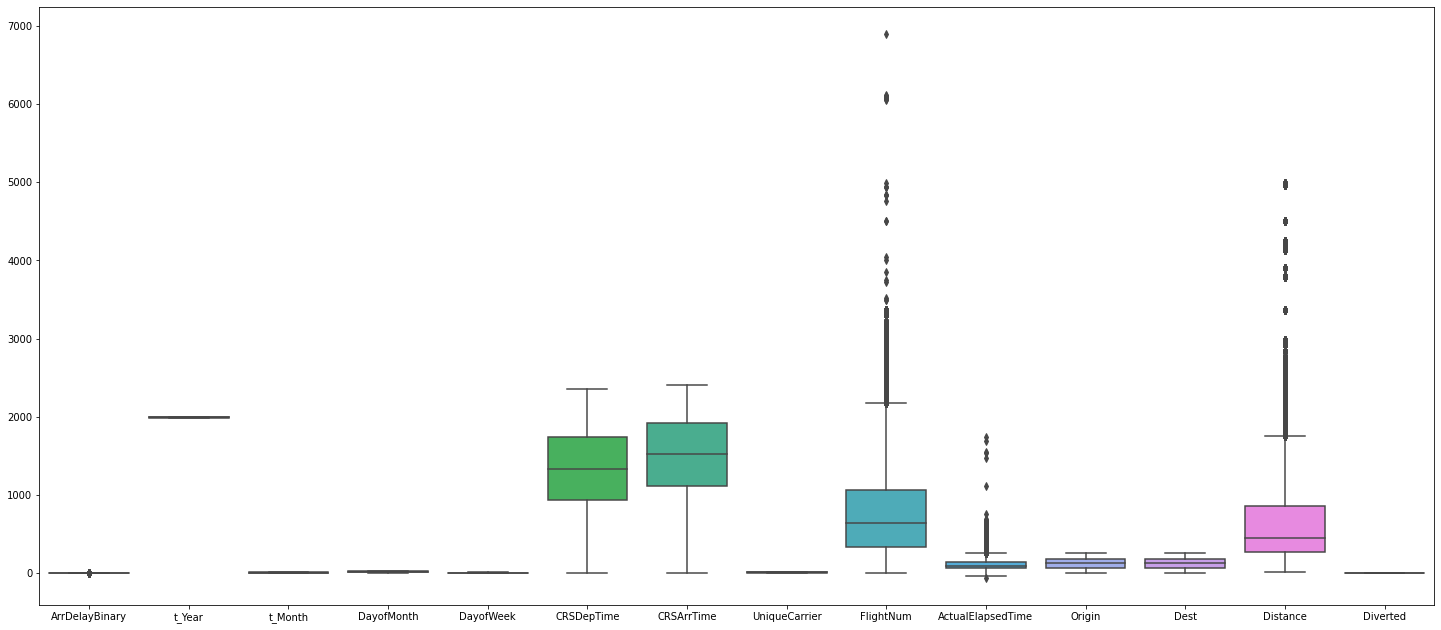

In [11]:
fig=plt.figure(figsize=(25,11))
sns.boxplot(data=df)
plt.show()

###**Data Visualization**

Training Dataset Pair Plot Chart

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


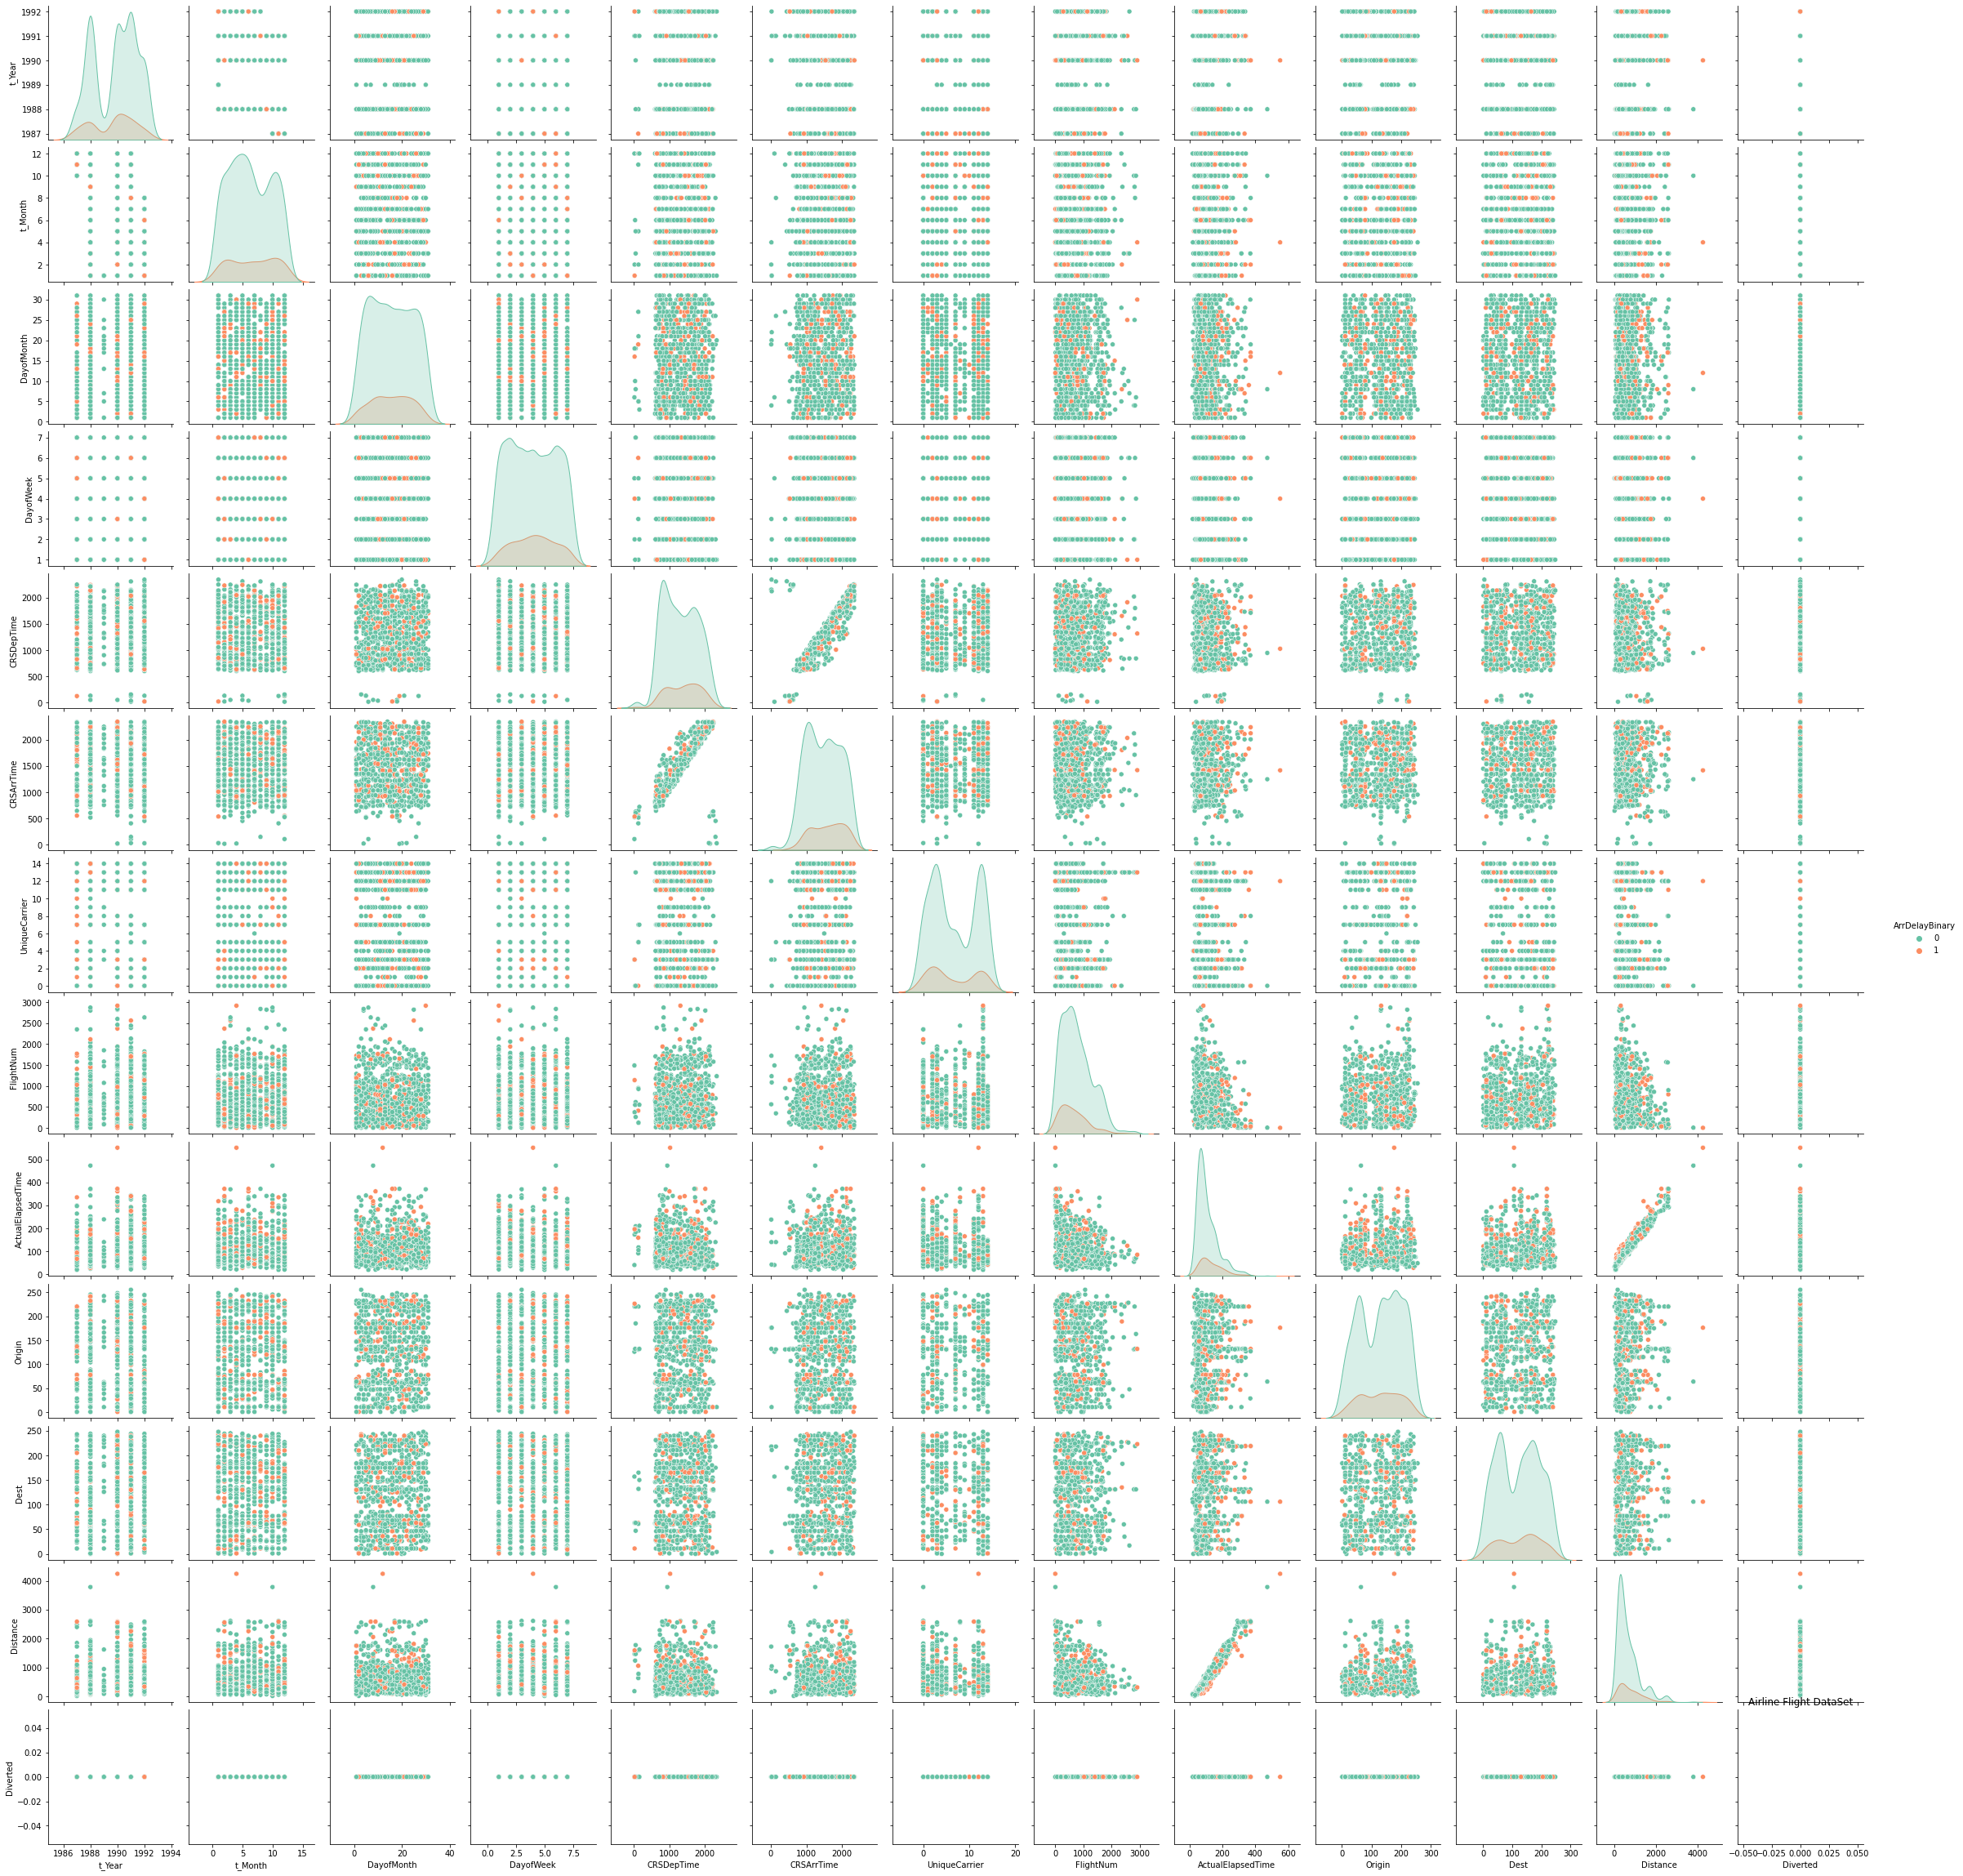

In [12]:
sns.pairplot(df.sample(1000), hue='ArrDelayBinary')
plt.title('Airline Flight DataSet')
plt.show()

- Plotting pairwise relationships in the airline flights dataset
- With excluding the ‘ArrDelayBinary’ as a hue

## Data Preperation

Removing Diverted Feature

In [13]:
df.drop('Diverted',axis=1,inplace=True)

Removing the outliers

In [14]:
df=df[(df['ActualElapsedTime']<df['ActualElapsedTime'].quantile(.95))&(df['ActualElapsedTime']>df['ActualElapsedTime'].quantile(.05))&(df['Distance']<df['Distance'].quantile(.95))]

In [15]:
df.shape

(3551580, 13)

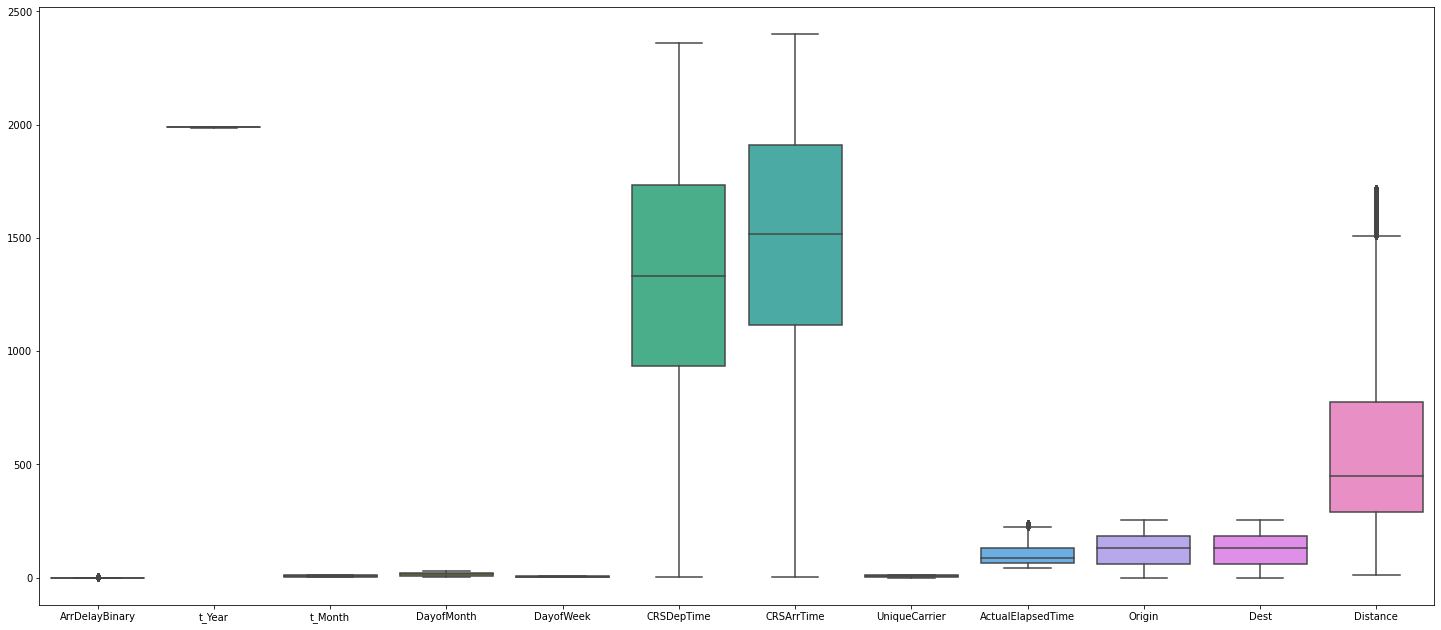

In [16]:
fig=plt.figure(figsize=(25,11))
sns.boxplot(data=df.drop('FlightNum',axis=1))
plt.show()

In [17]:
df=df[(df['ActualElapsedTime']<df['ActualElapsedTime'].quantile(0.95))&(df['Distance']<df['Distance'].quantile(.95))]

In [18]:
df.shape

(3333384, 13)

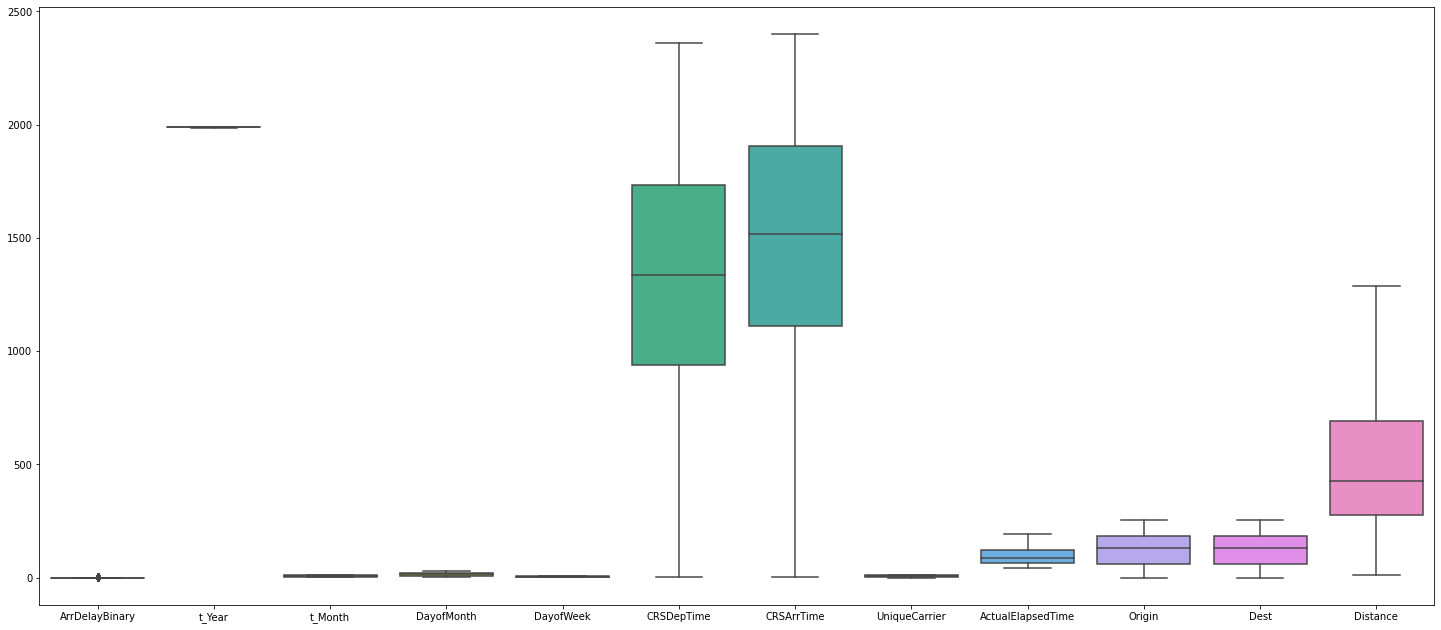

In [19]:
fig=plt.figure(figsize=(25,11))
sns.boxplot(data=df.drop('FlightNum',axis=1))
plt.show()

##Spliting and training the data

Features Correlation 

In [20]:
df.corr()

,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance
ArrDelayBinary,1.000000,-0.044075,-0.002131,0.005426,-0.000235,0.092042,0.093576,0.007897,-0.019392,0.138954,-0.008646,-0.000570,0.022103
t_Year,-0.044075,1.000000,-0.269714,-0.012729,-0.004944,-0.014546,-0.002231,0.044423,0.091920,0.050255,0.004244,0.004136,0.028096
t_Month,-0.002131,-0.269714,1.000000,-0.003186,0.001443,-0.000997,-0.002092,-0.025707,-0.007686,-0.008486,-0.007654,-0.006153,-0.002034
DayofMonth,0.005426,-0.012729,-0.003186,1.000000,-0.001453,-0.002090,-0.001982,-0.000335,0.000683,-0.000332,0.000317,-0.000167,-0.000077
DayofWeek,-0.000235,-0.004944,0.001443,-0.001453,1.000000,0.005673,0.007477,-0.013397,0.005326,0.004887,-0.001094,-0.000005,0.014558
CRSDepTime,0.092042,-0.014546,-0.000997,-0.002090,0.005673,1.000000,0.889459,0.005284,0.015719,-0.048631,-0.026780,0.014310,-0.052527
CRSArrTime,0.093576,-0.002231,-0.002092,-0.001982,0.007477,0.889459,1.000000,-0.001773,0.008440,0.068175,0.007541,-0.006345,0.068754
UniqueCarrier,0.007897,0.044423,-0.025707,-0.000335,-0.013397,0.005284,-0.001773,1.000000,-0.006739,-0.184599,0.096006,0.100376,-0.160265
FlightNum,-0.019392,0.091920,-0.007686,0.000683,0.005326,0.015719,0.008440,-0.006739,1.000000,-0.066205,0.042828,0.052213,-0.069032
ActualElapsedTime,0.138954,0.050255,-0.008486,-0.000332,0.004887,-0.048631,0.068175,-0.184599,-0.066205,1.000000,0.019218,0.034030,0.945527


Spliting and Training

In [21]:
X=df.drop('ArrDelayBinary',axis=1)
y=df.ArrDelayBinary

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

##Modelling

#### Decision Tree Classifier

In [22]:
dtc=DecisionTreeClassifier()

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
dtc.feature_importances_

array([0.03609684, 0.06982127, 0.12450007, 0.06489951, 0.07816595,
       0.09122484, 0.03385647, 0.08754017, 0.16012982, 0.05052708,
       0.05411298, 0.149125  ])

In [25]:
preds_dtc=dtc.predict(X_test)

In [26]:
preds_dtc

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

####Grid Optimization

In [27]:
p_grid = {'criterion': ['entropy','gini'],
          'splitter': [ 'random','best'],
          'max_depth':[5,10,15,20]
           }

grid = GridSearchCV( dtc, p_grid,cv=3)

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [29]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}

In [30]:
dtc=DecisionTreeClassifier(criterion= 'entropy', max_depth= 15, splitter= 'best')

In [31]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dtc.feature_importances_

array([0.03659196, 0.02791898, 0.02673207, 0.01715347, 0.06189696,
       0.03621122, 0.05048273, 0.02929562, 0.29709929, 0.04433509,
       0.0482452 , 0.32403742])

In [33]:
preds_dtc_grid=dtc.predict(X_test)

In [34]:
preds_dtc_grid

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

##Model Scoring

#### Decision Tree Classifier Score

##### Accuracy Score

In [35]:
accuracy_score(y_test,preds_dtc)

0.8046921249260012

##### Confusion matrix

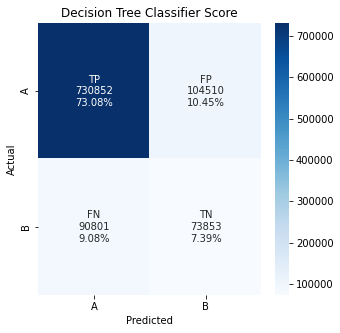

In [36]:
cf = confusion_matrix(y_test, preds_dtc)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Decision Tree Classifier Score")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

####Decision Tree Classifier Score After Grid Optimization

##### Accuracy Score

In [37]:
accuracy_score(y_test,preds_dtc_grid)

0.8656841490536151

##### Confusion matrix

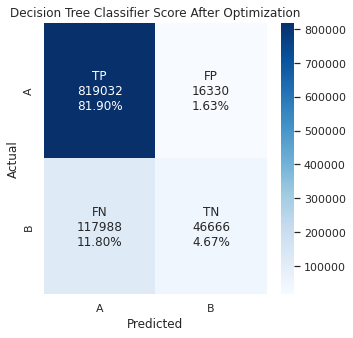

In [38]:
cf = confusion_matrix(y_test, preds_dtc_grid)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Decision Tree Classifier Score After Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

##Ploting the tree

KeyError: ignored

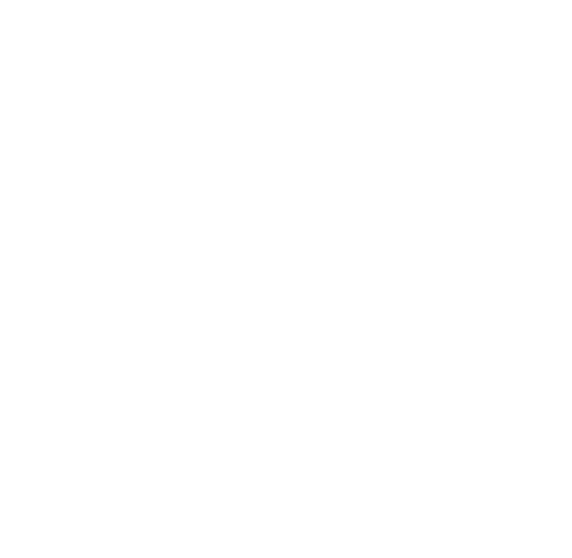

In [39]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,max_depth=3)
plt.title('Decision Tree')
plt.show()